<a href="https://colab.research.google.com/github/tousifp777/DataScience/blob/main/Loan_Approval_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Import Data Manipulation Library
import pandas as pd
import numpy as np

# Import Data Visualization Library
import seaborn as sns
import matplotlib.pyplot as plt

# Import Data Filter Warning Libraries
import warnings
warnings.filterwarnings('ignore')

# Import Logging
import logging
logging.basicConfig(level = logging.INFO,
                    filename = 'model.log',
                    format = '%(asctime)s) - %(levelname)s - %(message)s',
                    filemode = 'w')
logging.info('Model Started')

In [5]:
# Importing Dataset using Pandas Function

df = pd.read_csv('loan_data.csv')

df.sample(frac = 1)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
23178,29.0,female,Bachelor,72974.0,8,MORTGAGE,15000.0,DEBTCONSOLIDATION,12.87,0.21,5.0,692,Yes,0
37296,43.0,male,Associate,81295.0,15,MORTGAGE,10000.0,MEDICAL,11.44,0.12,15.0,667,Yes,0
38397,27.0,female,Master,103235.0,5,RENT,12000.0,PERSONAL,11.94,0.12,5.0,652,No,0
1979,23.0,male,Associate,55172.0,4,RENT,2100.0,VENTURE,11.48,0.04,4.0,594,Yes,0
22691,28.0,female,Bachelor,62297.0,5,RENT,7500.0,VENTURE,16.49,0.12,7.0,653,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33522,26.0,female,Bachelor,115422.0,0,RENT,24153.0,EDUCATION,8.89,0.21,3.0,643,No,0
4230,22.0,female,Bachelor,48989.0,1,MORTGAGE,4000.0,VENTURE,10.36,0.08,4.0,680,No,0
1860,24.0,male,High School,118432.0,0,RENT,15000.0,DEBTCONSOLIDATION,14.93,0.13,2.0,543,No,1
28695,28.0,female,Bachelor,36889.0,6,RENT,3900.0,EDUCATION,11.99,0.11,9.0,660,Yes,0


In [6]:
# Checking Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

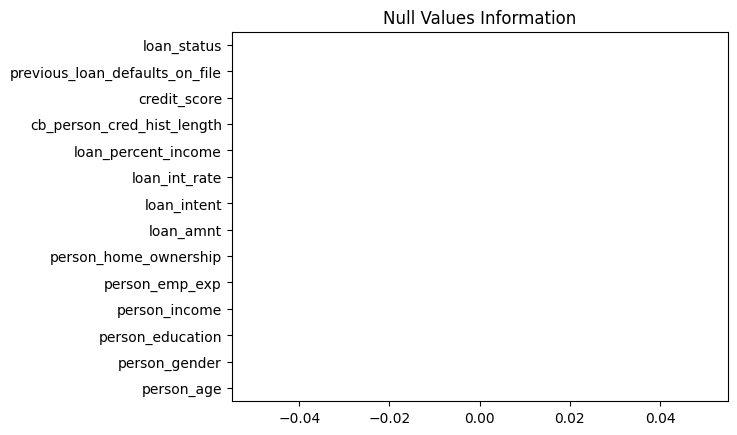

In [7]:
# Checking Null Values Present in Dataset

df.isnull().sum().plot(kind = 'barh')
plt.title('Null Values Information')
plt.show()

In [8]:
# Split the dataset into Categorical and Numerical cols...
categorical_col = df.select_dtypes(include = 'object')
numerical_col = df.select_dtypes(exclude = 'object')

In [9]:
# Exploratory Data Analysis:
# 1. Univariate Analysis
'''
Step1: Create a Blank List: stats[]
Step2: Create Dictionary using OrderedDict
Step3: Append list with Dictionary
Step4: Convert stats[] i.e. List into DataFrame
'''

from collections import OrderedDict

stats = []

for i in numerical_col.columns:
  numerical_stats = OrderedDict({
      'Feature':i,
      'Count':df[i].count(),
      'Mean':df[i].mean(),
      'Median':df[i].median(),
      'Maximum':df[i].max(),
      'Minimum':df[i].min(),
      'Q1':df[i].quantile(0.25),
      'Q3':df[i].quantile(0.75),
      'IQR':df[i].quantile(0.75)-df[i].quantile(0.25),
      'Standard Deviation':df[i].std(),
      'Skewness':df[i].skew(),
      'Kurtosis':df[i].kurt()
  })
  stats.append(numerical_stats)
  report = pd.DataFrame(stats)

report

,Feature,Count,Mean,Median,Maximum,Minimum,Q1,Q3,IQR,Standard Deviation,Skewness,Kurtosis
0,person_age,45000,27.764178,26.00,144.00,20.00,24.00,30.00,6.00,6.045108,2.548154,18.649449
1,person_income,45000,80319.053222,67048.00,7200766.00,8000.00,47204.00,95789.25,48585.25,80422.498632,34.137583,2398.684769
2,person_emp_exp,45000,5.410333,4.00,125.00,0.00,1.00,8.00,7.00,6.063532,2.594917,19.168324
3,loan_amnt,45000,9583.157556,8000.00,35000.00,500.00,5000.00,12237.25,7237.25,6314.886691,1.179731,1.351215
4,loan_int_rate,45000,11.006606,11.01,20.00,5.42,8.59,12.99,4.40,2.978808,0.213784,-0.420335
5,loan_percent_income,45000,0.139725,0.12,0.66,0.00,0.07,0.19,0.12,0.087212,1.034512,1.082416
6,cb_person_cred_hist_length,45000,5.867489,4.00,30.00,2.00,3.00,8.00,5.00,3.879702,1.631720,3.725945
7,credit_score,45000,632.608756,640.00,850.00,390.00,601.00,670.00,69.00,50.435865,-0.610261,0.203022
8,loan_status,45000,0.222222,0.00,1.00,0.00,0.00,0.00,0.00,0.415744,1.336351,-0.214176


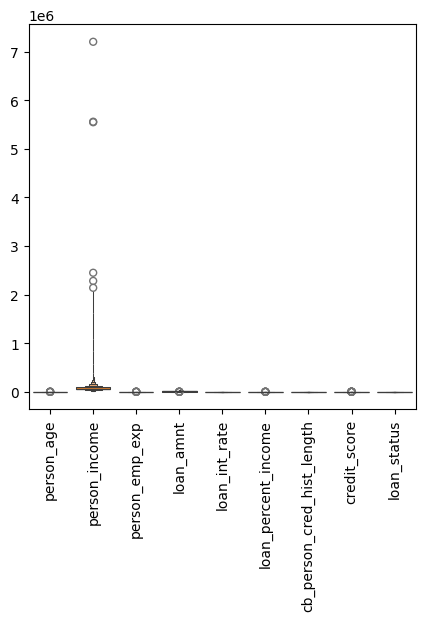

In [10]:
plt.figure(figsize = (5,5))
sns.boxenplot(data = df)
plt.xticks(rotation = 90)
plt.show()

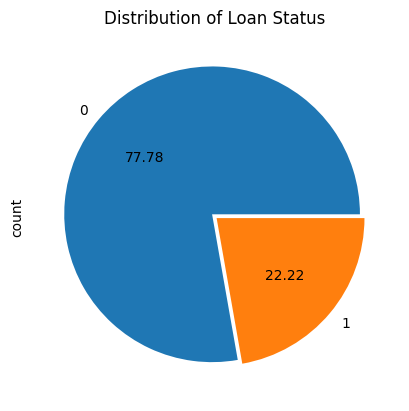

In [11]:
# Distribution of loan status
'''
Data Insights:
77.78 % People Not approved their loan status from bank
22.22 % People approved their loan status from bank
'''
df['loan_status'].value_counts().plot(kind = 'pie',autopct = '%1.2f',explode = [0.02,0.02])
plt.title('Distribution of Loan Status')
plt.show()

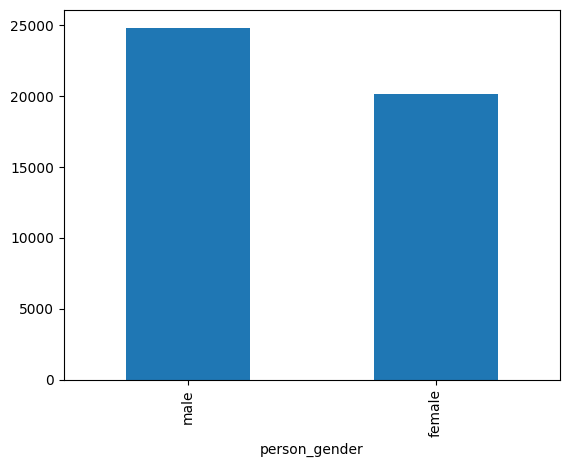

In [12]:
# Gender Distribution

df['person_gender'].value_counts().plot(kind = 'bar')
plt.show()

In [13]:
# Loan status based on Gender
# Loan is approved and Gender must be Male

loan_status_approved_male = df[(df['loan_status'] == 1) & (df['person_gender'] == 'male')]

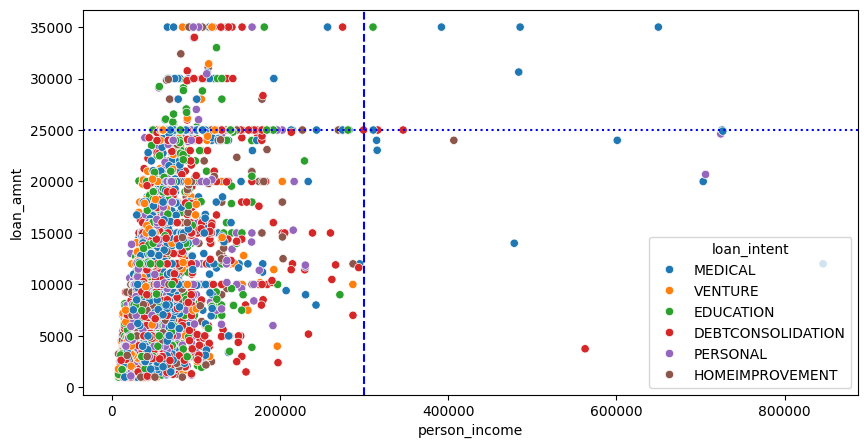

In [14]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = loan_status_approved_male['person_income'],y = loan_status_approved_male['loan_amnt'],hue = loan_status_approved_male['loan_intent'])
plt.axvline(300000,linestyle = '--',c = 'b')
plt.axhline(25000,linestyle = ':',c = 'b')
plt.show()

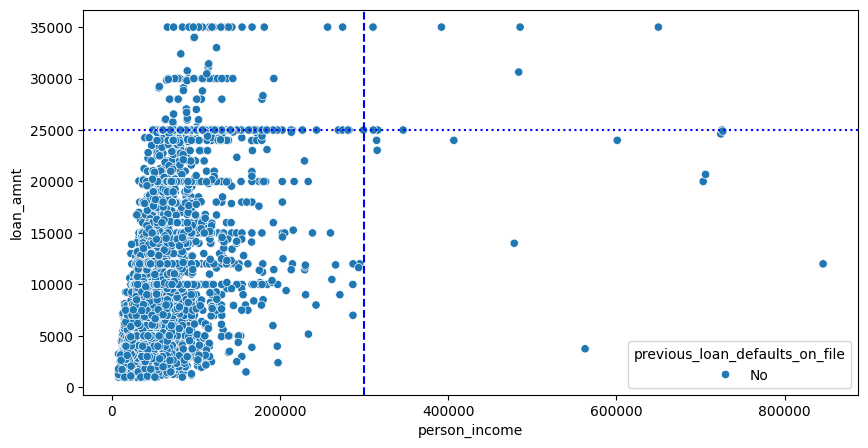

In [15]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = loan_status_approved_male['person_income'],y = loan_status_approved_male['loan_amnt'],hue = loan_status_approved_male['previous_loan_defaults_on_file'])
plt.axvline(300000,linestyle = '--',c = 'b')
plt.axhline(25000,linestyle = ':',c = 'b')
plt.show()

In [16]:
loan_status_notapproved_male = df[(df['loan_status'] == 0) & (df['person_gender'] == 'male')]

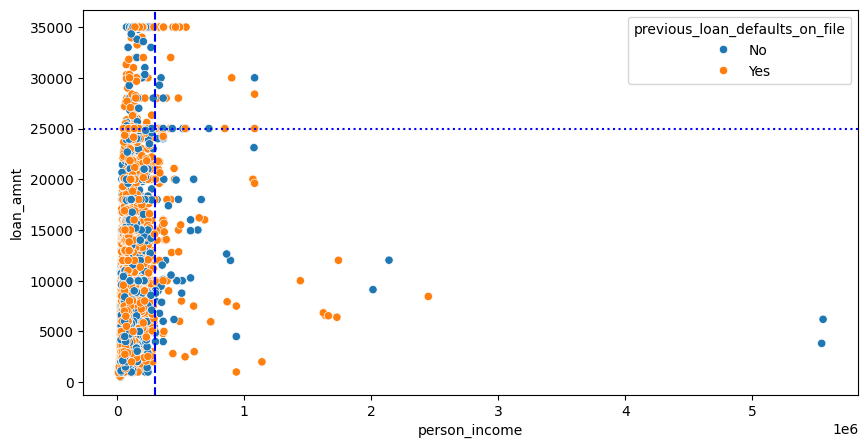

In [17]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = loan_status_notapproved_male['person_income'],y = loan_status_notapproved_male['loan_amnt'],hue = loan_status_notapproved_male['previous_loan_defaults_on_file'])
plt.axvline(300000,linestyle = '--',c = 'b')
plt.axhline(25000,linestyle = ':',c = 'b')
plt.show()

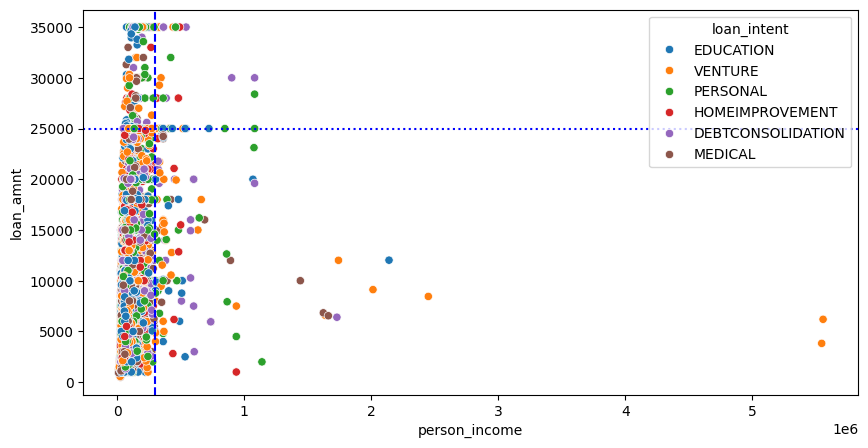

In [18]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = loan_status_notapproved_male['person_income'],y = loan_status_notapproved_male['loan_amnt'],hue = loan_status_notapproved_male['loan_intent'])
plt.axvline(300000,linestyle = '--',c = 'b')
plt.axhline(25000,linestyle = ':',c = 'b')
plt.show()